In [6]:
import pandas as pd #import library pandas 

In [4]:
data = pd.read_csv("adult.csv") #read in file

In [5]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.columns #i can use this to keep track of the columns I have made

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
data.education.value_counts() # useful command, sorts results basesd on frequency
#this is important as the class may only occur one time, therefore it isn really important and the column can be dropped

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [6]:
#data = pd.concat([data.drop("relationship", axis=1), pd.get_dummies(data.relationship).add_prefix("relationship_")], axis=1)
#data = pd.concat([data.drop("workclass", axis=1), pd.get_dummies(data.workclass).add_prefix("workclass_")], axis=1)

In [7]:
data = pd.concat([data.drop("occupation", axis = 1), pd.get_dummies(data.occupation).add_prefix("occupation_")], axis = 1) #use .concat() to add together two datasets, datsets must be in a list
data = pd.concat([data.drop("workclass", axis = 1), pd.get_dummies(data.workclass).add_prefix("workclass_")], axis = 1)   #we use drop() to drop the column we are making dummies of
data = pd.concat([data.drop("marital-status", axis = 1), pd.get_dummies(data["marital-status"]).add_prefix("marital-status_")], axis = 1)#  <----how to get around weird quoting mistake
data = pd.concat([data.drop("relationship", axis = 1), pd.get_dummies(data.relationship).add_prefix("relationship_")], axis = 1)
data = pd.concat([data.drop("race", axis = 1), pd.get_dummies(data.race).add_prefix("race_")], axis=1)# we are only doing this because before they weren't numerical features and so its harder to 
#find correlation coeffiecient, (correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables)
data = data.drop("education", axis=1)#dropped education column bcuz in this dataset there was two very similar ones


In [8]:
data = pd.concat([data.drop("native-country", axis = 1), pd.get_dummies(data["native-country"]).add_prefix("native-country")], axis = 1)

In [9]:
data #we  have these numerical features now 

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
data["gender"] = data["gender"].apply(lambda x: 1 if x == "Male" else 0) #turning the binary features into numerrical features to help find correlation coeffient
data["income"] = data["income"].apply(lambda x: 1 if x == ">50K" else 0) #very cool use of code "lambda" 

In [11]:
#data["native-countryPortugal"] = data["native-countryPortugal"].apply(lambda x: "hello" if x == 0 else x)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt #importing various libraries

<Axes: >

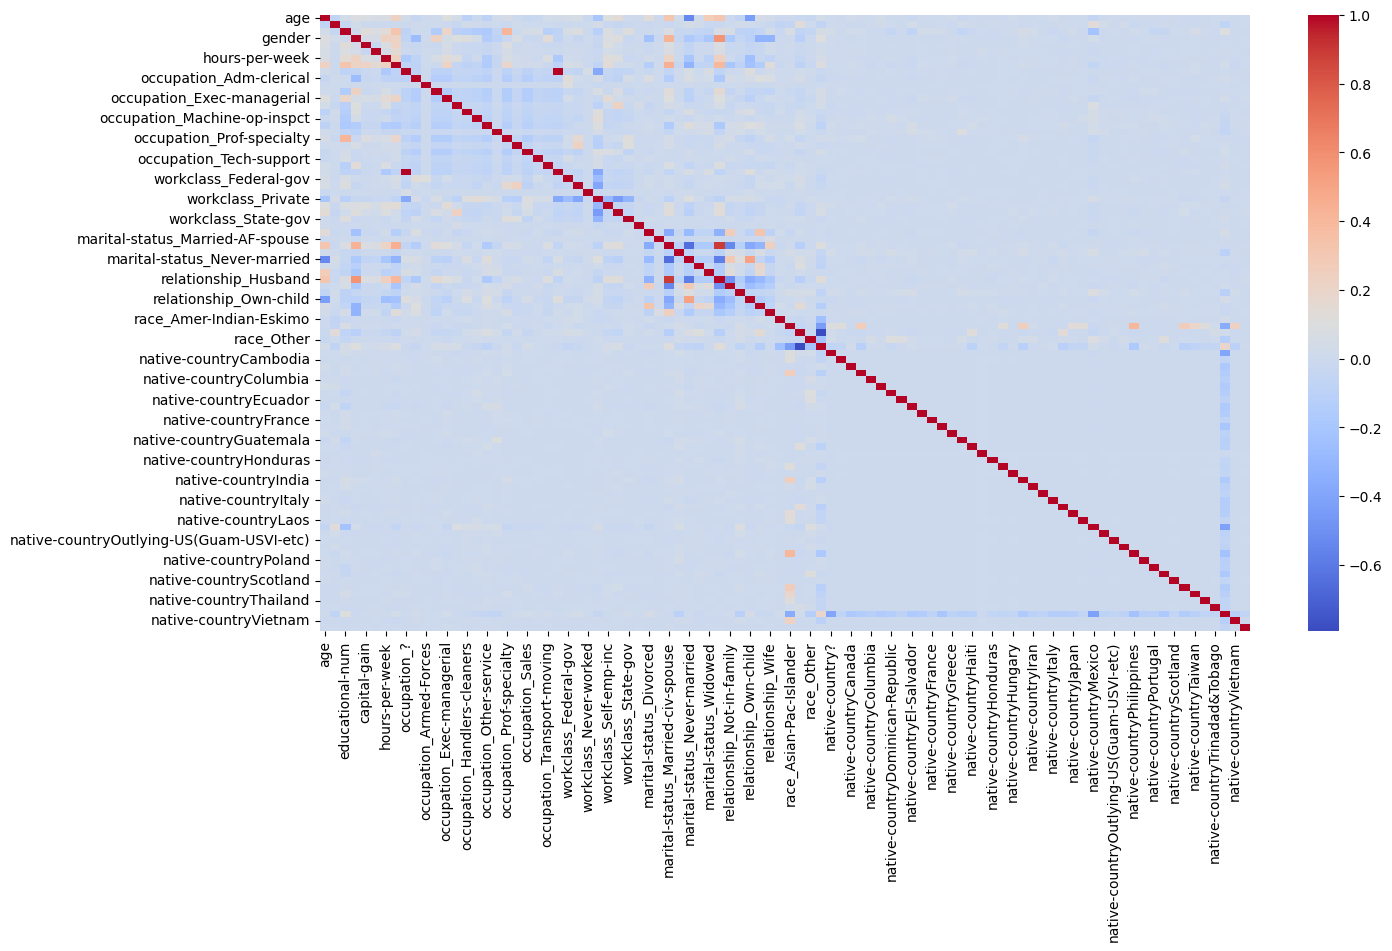

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot =False, cmap="coolwarm")

In [14]:
data.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-countryThailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-countryTrinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-countryUnited-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-countryVietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [19]:
correlations = data.corr()["income"]
print(correlations)

age                              0.230369
fnlwgt                          -0.006339
educational-num                  0.332613
gender                           0.214628
capital-gain                     0.223013
                                   ...   
native-countryThailand          -0.004219
native-countryTrinadad&Tobago   -0.009107
native-countryUnited-States      0.032551
native-countryVietnam           -0.015542
native-countryYugoslavia         0.005522
Name: income, Length: 92, dtype: float64


In [28]:
correlations = data.corr()["income"].abs()
# The .corr() function calculates the correlation coefficient between every pair of numeric columns(the range of the coefficients is between -1 and 1)
# However when you have data.corr()["income"] it only retrieves the coefficients between "income" and the other feature columns, so returns only one column of cofficients
#the .abs() returns every coefficient in the positive (abosolute value)
sorted_correlations = correlations.sort_values() # Sorts the order of the coefficients from smallest to biggest
num_cols_to_drop = int(0.8 * len(data.columns))	# this line is used to find the number of columns we are gonna remove in the visualizations, finds total number
#of columns and multiply by 0.8 and rounds the number, try printing each part
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
data_dropped = data.drop(cols_to_drop, axis=1)
print(int(len(data.columns) * 0.8))

73


In [22]:
data_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

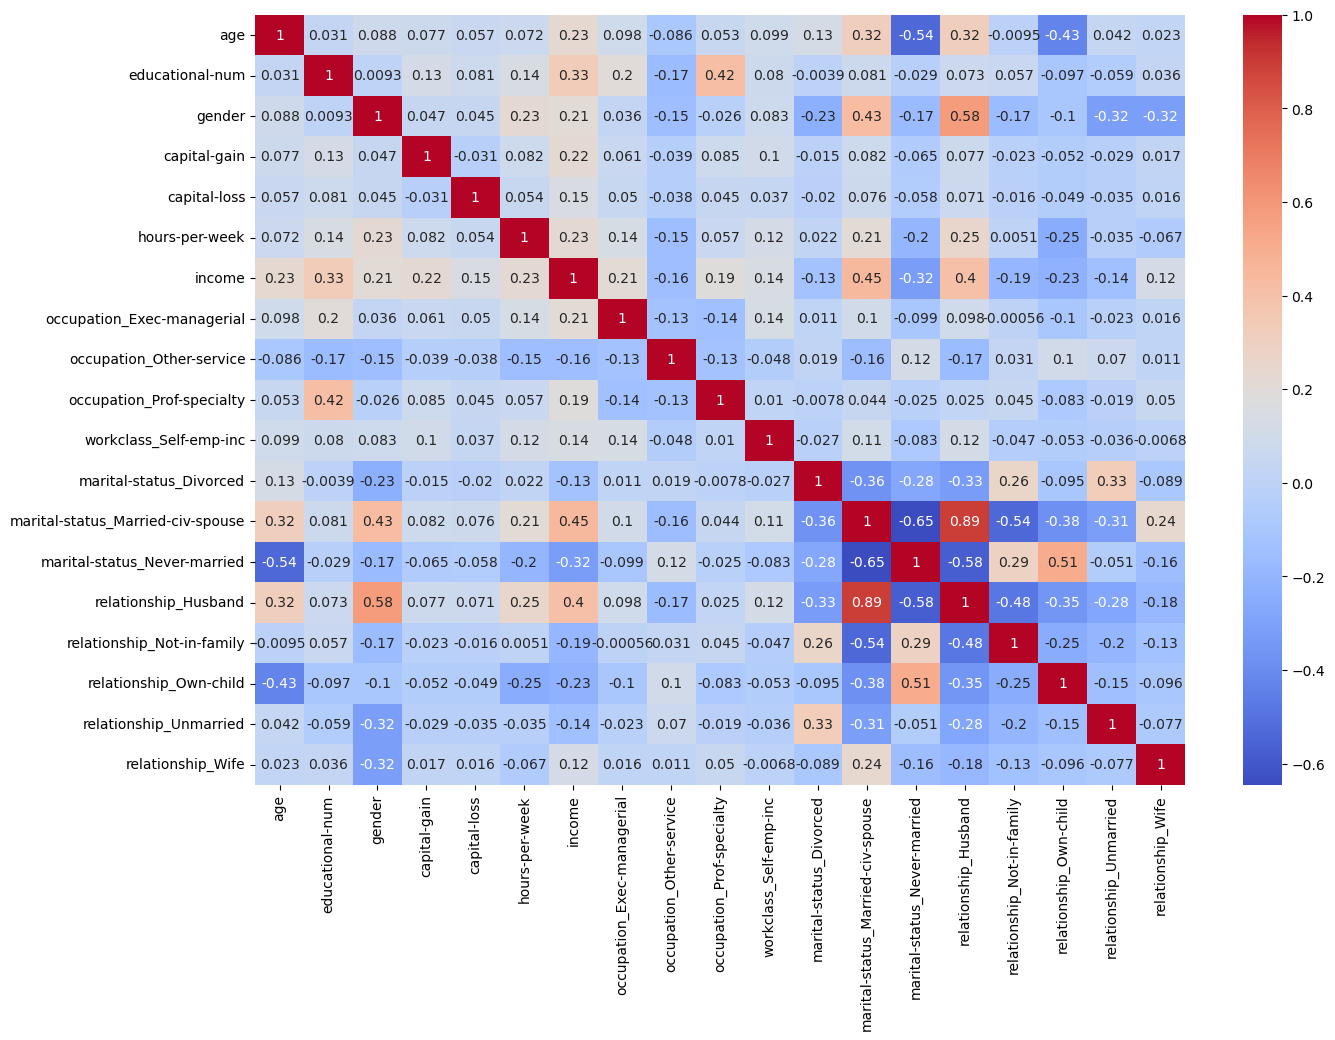

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data_dropped.corr(), annot =True, cmap="coolwarm")